# Decision Trees



In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os
from sklearn import tree


In [73]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\iris'

In [30]:
os.chdir('C:\\Users\Lenovo\Desktop\iris')

In [43]:
df = pd.read_csv('iris.data', names=["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"])

In [44]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [46]:
df.shape

(150, 5)

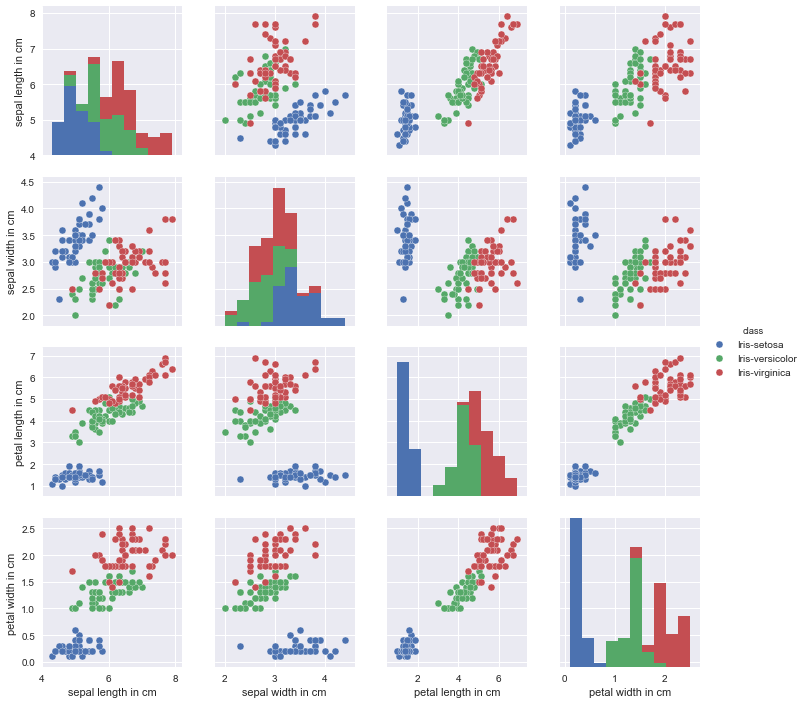

In [48]:
sns.pairplot(df, hue = 'class')

In [50]:
target = df['class']
data= df.drop('class',axis=1)

# Test Train Split

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, \
                                                   target, \
                                                   test_size = 0.25, \
                                                   random_state = 0)

# Training

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediction

In [54]:
y_test_pred = classifier.predict(X_test)

# Measuring Performance

#Accuracy

In [55]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8947368421052632

# Confusion Matrix

In [56]:
con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  3,  6]], dtype=int64)

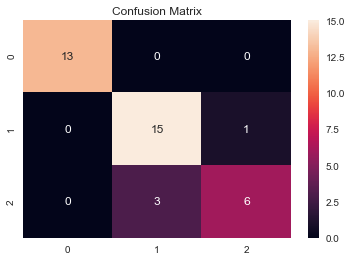

In [58]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()